In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from __future__ import print_function, division 

plt.style.use('seaborn-poster')

We are going to generate a random sample of data using ```numpy.random.gauss```

In [110]:
data1 = np.random.normal(loc=5,scale=1, size=1000) # 1st gaussian
data2 = np.random.normal(loc=10,scale=2, size=3000) # 2nd gaussian
data = np.concatenate((data1,data2))

ntotal = data.size
print (data[:5])

[4.78705425 6.59919502 5.38440196 4.60713809 4.81651871]


Now we are going to make the representation of the data in a histogram

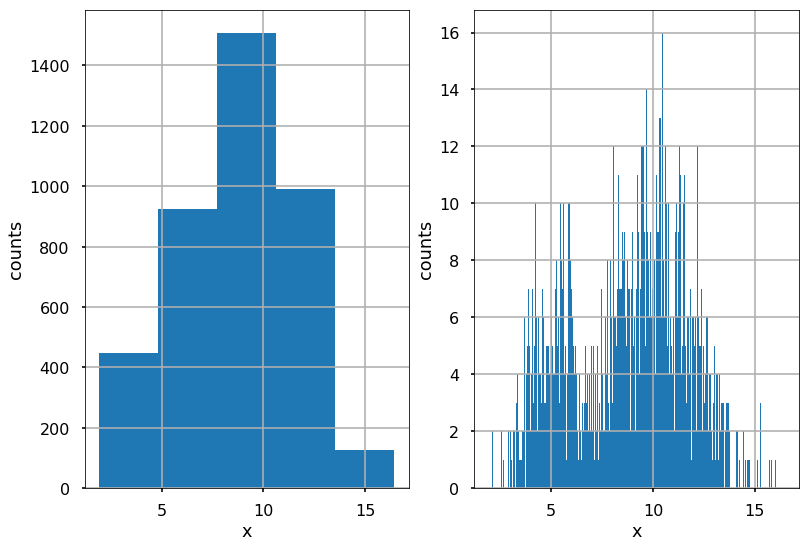

In [85]:
fig, axes = plt.subplots(1,2)
axes[0].grid()
axes[0].hist(data, bins = 5)
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

axes[1].hist(data, bins = 1000)
axes[1].grid()
axes[1].set_xlabel("x")
axes[1].set_ylabel("counts")

plt.show()

Which one of the 2 binning is correct?

### Error of a bin

Each bin of a histogram has associated an error. This error can be derived from the binomial distribution. Indeed, we can see the process of an event falling into a bin (or not) as a binomial event. The probability of having $k$ success, or k events falling in a bin should therefore follow the binomial distribution:

$$P(k; n, p) = {n \choose k} p^k(1-p)^{n-k}$$

where $n$ are the total number of events in the sample and $p$ is the probability to fall into a given bin. This probability is unknown, but I could estimate from the histogram itself. For a given bin $i$, if I have $n_i$ events inside a bin $i$ then I can approximate the probability of falling into that bin as the ratio of events inside this bin, and the total number of events:

$$p\simeq \frac{n_i}{n}$$

In this case the mean of the binomial distribution for that particular bin $i$ can be written as:

$$\mu_i = n\cdot p \equiv n_i$$ 
In other words, the mean of the binomial distribution of each bin, is the bin content $n_i$. I can do the same for the variance:

$$\sigma_i = \sqrt{np(1-p)} = \sqrt{n\frac{n_i}{n}(1 -\frac{ni}{n})} = \sqrt{n_i} $$

Et voilá, I arrived at the conclusion that distribution of events inside a bin, should follow a binomial distribution with mean equal to the number of events inside a bin, and a dispersion of squared root of that number!

With this knowledge is now clear that from the plots above the one with 5 bins the fine structure of the data distribution is lost (too small relative errors), while with 1000 bins, heights of individual bins change more than the size of the bin errors (sampling error).



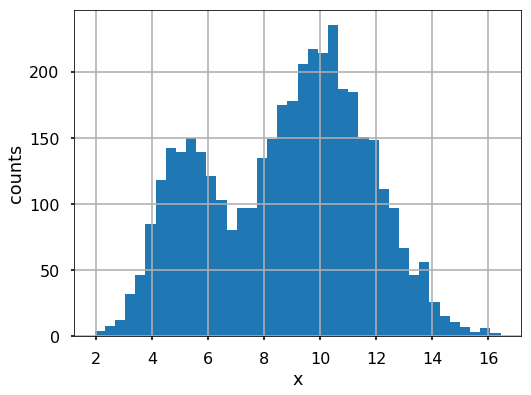

In [90]:

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.hist(data, bins = 40)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.grid()
plt.show()



I can in principle also use different binning for different regions of a histrogram.

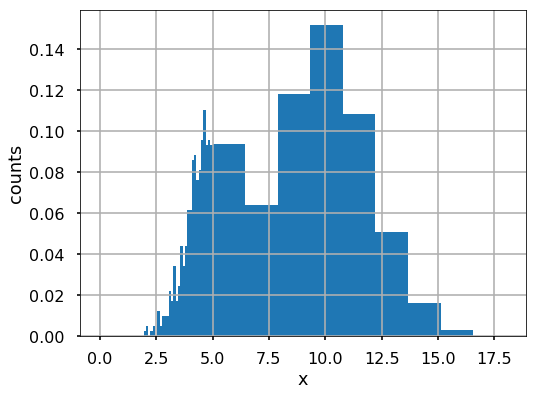

In [92]:
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
bin_edges, hist, patches = ax.hist(data, bins = np.concatenate((np.linspace(0, 5, 50,
                                               endpoint=True),
                                     np.linspace(5,18, 10))), 
        normed=True)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.show()

The method matplotlib.hist returns as well the bin_edges, the heights of the bins and an array of objects called patches, which represent the color, geometry, etc. of the bin representation.


### Working without plotting

So far we used matplotlib plt.hist to create the historgrams. Sometimes you only need to access the information of the histograms without plotting them. In that case we can use numpy.histogram method which returns the same information as matplotlib.histogram but without the patches:


In [93]:
hist, bin_edges = np.histogram(data, bins= 40)

print (hist)
print (bin_edges)

[  4   8  12  32  46  85 118 142 139 150 139 121 103  80  97  97 135 149
 175 178 206 217 214 235 187 185 151 148 111  97  67  46  56  26  15  11
   7   3   6   2]
[ 1.94124371  2.30360522  2.66596673  3.02832825  3.39068976  3.75305128
  4.11541279  4.47777431  4.84013582  5.20249733  5.56485885  5.92722036
  6.28958188  6.65194339  7.01430491  7.37666642  7.73902793  8.10138945
  8.46375096  8.82611248  9.18847399  9.55083551  9.91319702 10.27555853
 10.63792005 11.00028156 11.36264308 11.72500459 12.08736611 12.44972762
 12.81208914 13.17445065 13.53681216 13.89917368 14.26153519 14.62389671
 14.98625822 15.34861974 15.71098125 16.07334276 16.43570428]


In [94]:
print (hist.size)
print (bin_edges.size)

40
41


Note that the bin_edges have an element more than the bin heights since it gives the overflow bin_edge. Also note that numpy returns the bin_edges and not the bin centers nor the bin widths. I can calulate those easily:


In [95]:
binwidths = np.diff(bin_edges)

print (binwidths)
print (binwidths.size)

[0.36236151 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151
 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151
 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151
 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151
 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151
 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151 0.36236151
 0.36236151 0.36236151 0.36236151 0.36236151]
40


In [96]:
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2.
print (bin_centers)
print (bin_centers.size)

[ 2.12242446  2.48478598  2.84714749  3.20950901  3.57187052  3.93423203
  4.29659355  4.65895506  5.02131658  5.38367809  5.74603961  6.10840112
  6.47076263  6.83312415  7.19548566  7.55784718  7.92020869  8.28257021
  8.64493172  9.00729323  9.36965475  9.73201626 10.09437778 10.45673929
 10.81910081 11.18146232 11.54382384 11.90618535 12.26854686 12.63090838
 12.99326989 13.35563141 13.71799292 14.08035444 14.44271595 14.80507746
 15.16743898 15.52980049 15.89216201 16.25452352]
40


### Normalization of histograms

As default histograms are representation of occourence ie, in their y-axis they show $n_i$ which is just the number of events inside that bin. However, histograms can also be used to represent a density distribution. In this case histograms need to be normalized. Normalizing a histogram means divinding each bin by the total number and the binwidth, ie:

$$ n_i \rightarrow \frac{n_i}{\Delta x n} $$

since

$$\lim_{n\rightarrow \infty, \Delta x \rightarrow 0} \frac{n_i}{n \Delta x} \equiv f(x)$$

and therefore the normalization  goes as:

$$\int_{-\infty}^{\infty} f(x) {\rm d} x = 1 \rightarrow \sum_i^{k} \frac{n_i}{n \Delta x} \Delta x = 1$$

The ```numpy.histogram``` method can already do the normalized histogram. It is called ```density``` and it divides each bin by the total number and the bin_width:

In [127]:
hist, bin_edges = np.histogram(data, bins= 40, density = True)

print (np.sum(hist))


2.575368123943366


Note that the sum is not 1. You need to multiply by the bin width to make:

$$\sum_i^{k} \frac{n_i}{n \Delta x} \Delta x = 1 $$

In [129]:
bin_width = np.diff(bin_edges)[0]

print (np.sum(hist)*bin_width)

1.0000000000000002


Now I have all these series of heights and edges, how can I plot this without going back to ```plt.hist```?

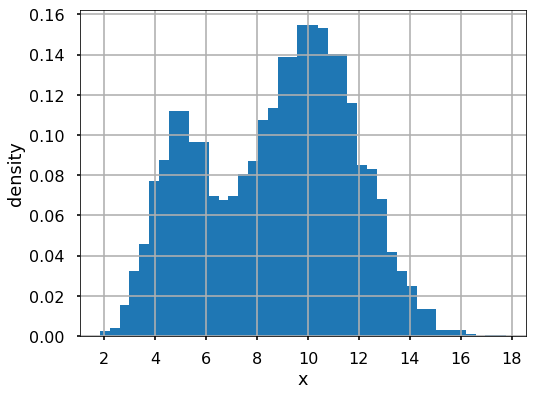

In [130]:

bin_centers = bin_edges[:-1] + bin_width/2.


fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.bar(bin_centers, hist)
ax.set_xlabel("x")
ax.set_ylabel("density")